# Model evaluation

In [1]:
import numpy as np

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

import tensorflow as tf

import utils

np.set_printoptions(precision=2)
tf.get_logger().setLevel('ERROR')
tf.autograph.set_verbosity(0)

2025-11-20 22:43:49.521941: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-11-20 22:43:49.532844: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1763678629.546369   42631 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1763678629.550630   42631 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-11-20 22:43:49.564273: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instr

the shape of the inputs x is: (50, 1)
the shape of the targets y is: (50, 1)


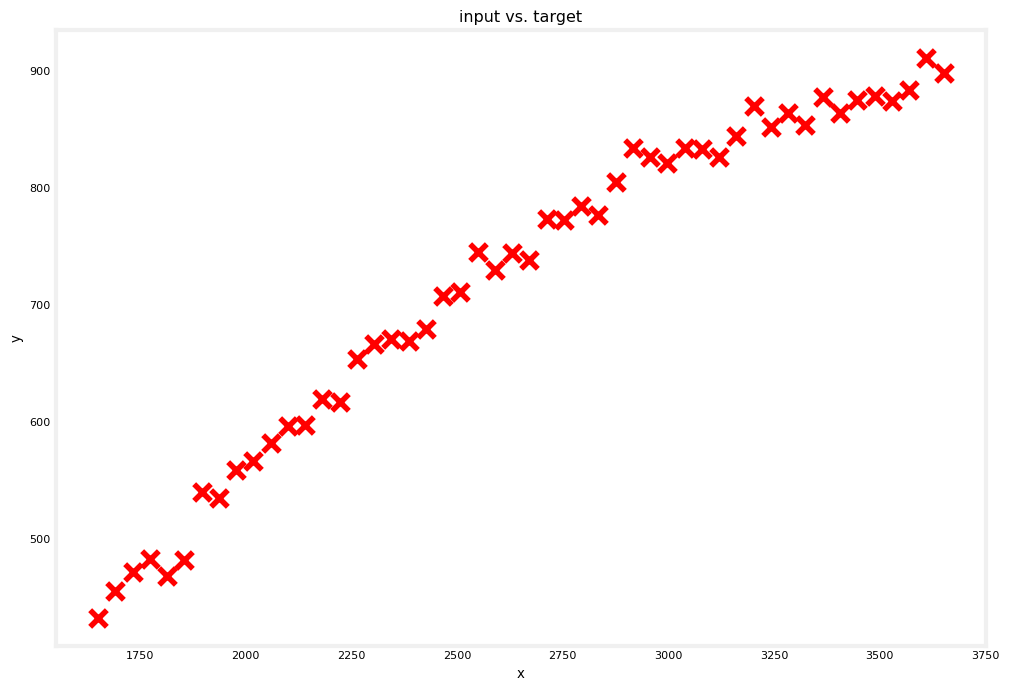

In [2]:
data = np.loadtxt('./data/data_w3_ex1.csv', delimiter=',')

# Split the inputs and outputs into separate arrays:
# first column => feature
x = data[:,0]
# second column => target
y = data[:,1]

# Convert 1-D arrays into 2-D because the commands later will require it
x = np.expand_dims(x, axis=1)
y = np.expand_dims(y, axis=1)

print(f"the shape of the inputs x is: {x.shape}")
print(f"the shape of the targets y is: {y.shape}")

utils.plot_dataset(x=x, y=y, title="input vs. target")

training set (input) is: (30, 1)
training set (target) is: (30, 1)

cross validation set (input) is: (10, 1)
cross validation set (target) is: (10, 1)

test set (input) is: (10, 1)
test set (target) is: (10, 1)


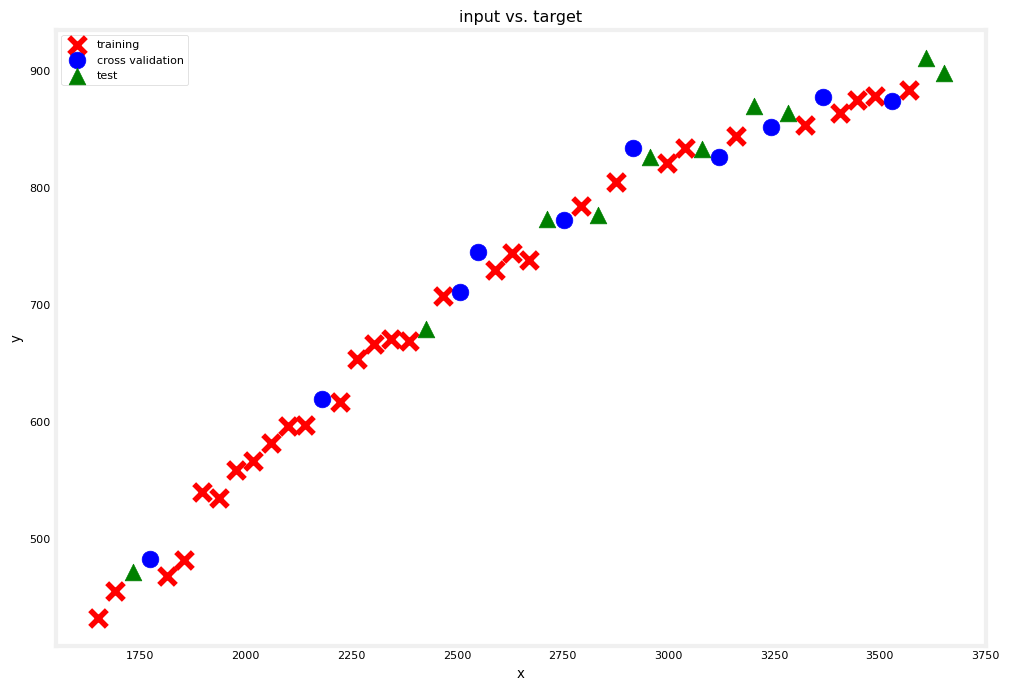

In [3]:
x_train, x_valtest, y_train, y_valtest = train_test_split(x, y, test_size=0.40, random_state=1)

x_val, x_test, y_val, y_test = train_test_split(x_valtest, y_valtest, test_size=0.5, random_state=1)

del x_valtest, y_valtest

print(f"training set (input) is: {x_train.shape}")
print(f"training set (target) is: {y_train.shape}\n")
print(f"cross validation set (input) is: {x_val.shape}")
print(f"cross validation set (target) is: {y_val.shape}\n")
print(f"test set (input) is: {x_test.shape}")
print(f"test set (target) is: {y_test.shape}")

utils.plot_train_cv_test(x_train, y_train, x_val, y_val, x_test, y_test, title="input vs. target")

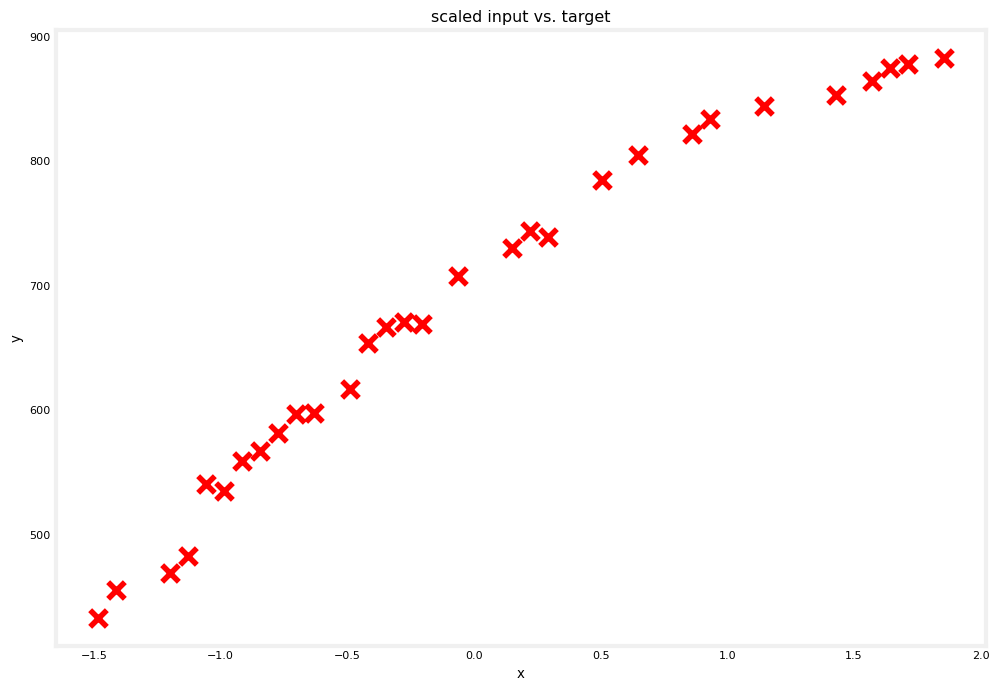

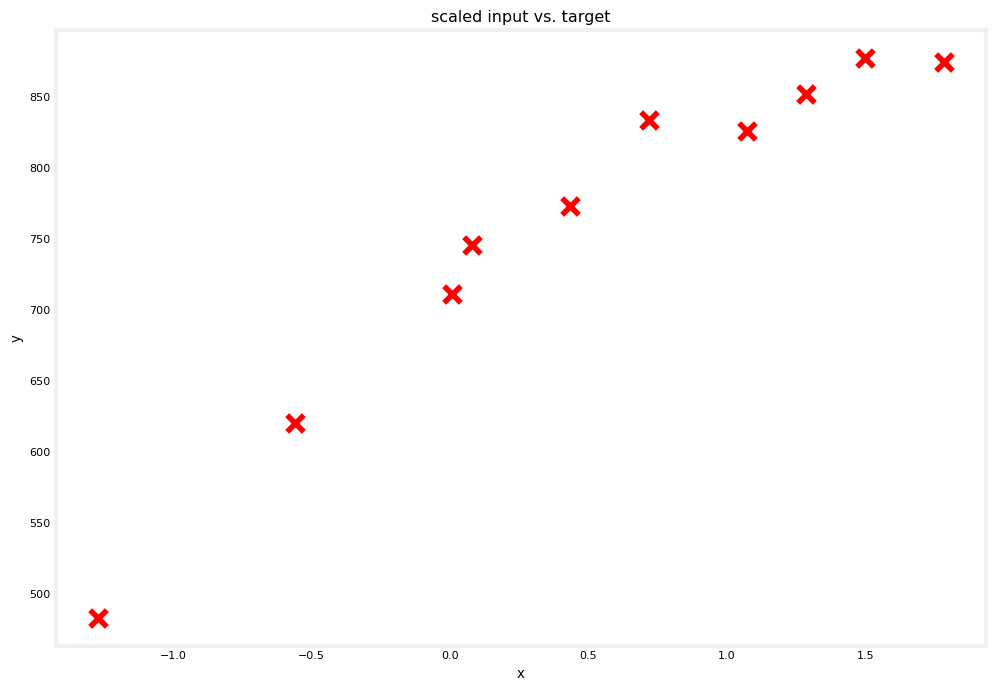

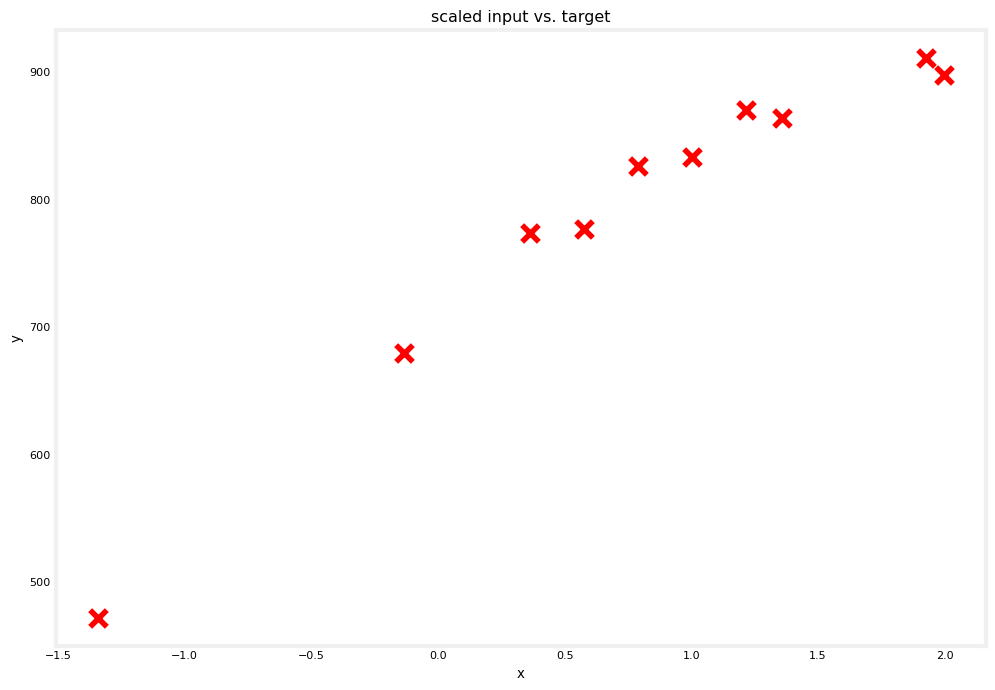

In [4]:
# Scaling
linear_scaler = StandardScaler()

X_train_scaled = linear_scaler.fit_transform(x_train)
X_val_scaled = linear_scaler.transform(x_val)
X_test_scaled = linear_scaler.transform(x_test)

utils.plot_dataset(x=X_train_scaled, y=y_train, title="scaled input vs. target")
utils.plot_dataset(x=X_val_scaled, y=y_val, title="scaled input vs. target")
utils.plot_dataset(x=X_test_scaled, y=y_test, title="scaled input vs. target")


In [5]:
model = LinearRegression()

In [6]:
model.fit(X_train_scaled, y_train);

In [7]:
w = model.coef_
b = model.intercept_
f'y^ = {w[0][0]} * x + {b[0]}'

'y^ = 136.35728659490553 * x + 681.5533349140229'

In [8]:
def mse_impl(y_true, y_pred):
  if y_true.shape != y_pred.shape:
    raise ValueError('y_true and y_pred should have the same shape.')

  m = y_pred.shape[0]
  total_squared_error = 0

  for i in range(len(y_pred)):
    total_squared_error += (y_pred[i] - y_true[i])**2
  
  return total_squared_error/(2 * m)

In [9]:
yhat_train = model.predict(X_train_scaled)

mse_train = mean_squared_error(y_train, yhat_train) / 2     #  as per the documentation, scikit-learn's implementation only divides by m and not 2*m
my_mse = mse_impl(y_train, yhat_train)

mse_train, my_mse

(406.19374192533155, array([406.19]))

In [10]:
yhat_val = model.predict(X_val_scaled)

mse_train = mean_squared_error(y_val, yhat_val) / 2     # as per the documentation, scikit-learn's implementation only divides by m and not 2*m
my_mse = mse_impl(y_val, yhat_val)

mse_train, my_mse, linear_scaler.mean_, linear_scaler.scale_

(551.7789026952216, array([551.78]), array([2504.06]), array([574.85]))

In [13]:
# Add polinomial features

polinomial = PolynomialFeatures(include_bias=False)
scale_polinomial = StandardScaler()

X_train_poli = polinomial.fit_transform(x_train)
X_train_poli_scaled = scale_polinomial.fit_transform(X_train_poli)

X_val_poli = polinomial.transform(x_val)
X_val_poli_scaled = scale_polinomial.transform(X_val_poli)

X_test_poli = polinomial.transform(x_test)
X_test_poli_scaled = scale_polinomial.transform(X_test_poli)

In [15]:
model = LinearRegression()
model.fit(X_train_poli_scaled, y_train);

In [16]:
yhat_train = model.predict(X_train_poli_scaled)

mse_train = mean_squared_error(y_train, yhat_train) / 2     #  as per the documentation, scikit-learn's implementation only divides by m and not 2*m
my_mse = mse_impl(y_train, yhat_train)

mse_train, my_mse

(49.11160933402512, array([49.11]))

In [17]:
yhat_val = model.predict(X_val_poli_scaled)

mse_train = mean_squared_error(y_val, yhat_val) / 2     # as per the documentation, scikit-learn's implementation only divides by m and not 2*m
my_mse = mse_impl(y_val, yhat_val)

mse_train, my_mse, linear_scaler.mean_, linear_scaler.scale_

(87.69841211111911, array([87.7]), array([2504.06]), array([574.85]))